In [27]:
from utils import prepare_jupyter
prepare_jupyter()

In [28]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

BASE_DIR = '/Users/tomek/University/MgrThesis/EnsembleDiversityResults/experiments-16-06'
# BASE_DIR = '../out'

def data_path(name):
    return os.path.join(BASE_DIR, name)

In [29]:
def scatterplot(df, datasets=['iris', 'cancer']):
    fig, axes = plt.subplots(ncols=len(datasets), figsize=(14, 5))

    for ax, dataset_name in zip(axes, datasets):
        data_df = df[df['dataset_name'] == dataset_name]
        x_name, y_name = 'node_diversity', 'accuracy'

        values = data_df[[x_name, y_name]].values
        xs, ys = values[:, 0], values[:, 1]
        
        print(f'Len = {len(xs)}')
        
        ax.set_title(dataset_name)
        ax.set_xlabel(x_name)
        ax.set_ylabel(y_name)
        ax.scatter(xs, ys)

In [33]:
lgb_df = pd.read_csv(data_path('lgbexperiment-ensemble.csv'))

# scatterplot(lgb_df)
iris_df = lgb_df[lgb_df['dataset_name'] == 'iris']
reduced_df = iris_df[['accuracy', 'attr_diversity', 'feature_diversity', 'node_diversity']]
count = len(reduced_df)

datapoints = []
for i in range(0, count):
    item_i = reduced_df.values[i]
    for j in range(i + 1, count):
        item_j = reduced_df.values[j]
        
        datapoints.append([abs(item_i[1] - item_j[1]), abs(item_i[0] - item_j[0])])
        
        
datapoints = np.array(datapoints)

Len = 179700


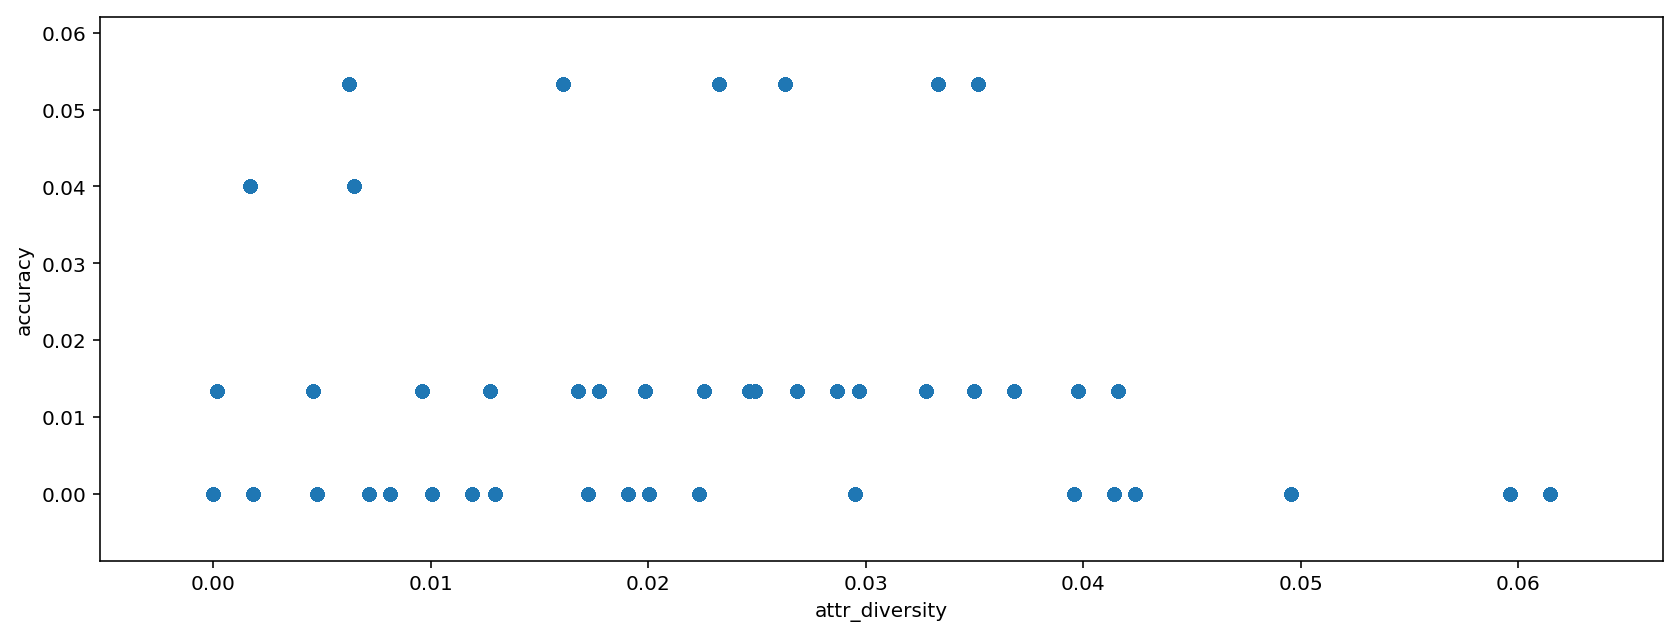

In [34]:
fig, ax = plt.subplots(ncols=1, figsize=(14, 5), dpi=144)

x_name, y_name = 'attr_diversity', 'accuracy'
xs, ys = datapoints[:, 0], datapoints[:, 1]

print(f'Len = {len(xs)}')

ax.set_xlabel(x_name)
ax.set_ylabel(y_name)
ax.scatter(xs, ys)

Len = 140
Len = 140


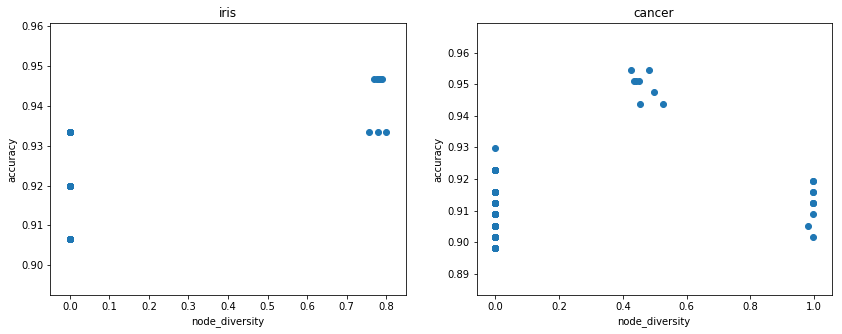

In [32]:
ada_df = pd.read_csv(data_path('adaboostexperiment-ensemble.csv'))
scatterplot(ada_df)

Len = 100
Len = 100


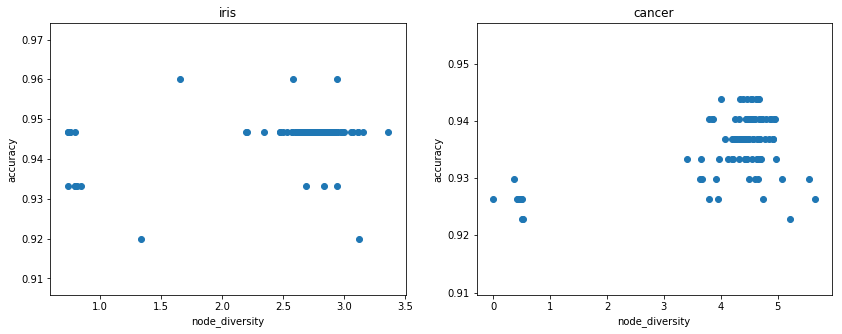

In [9]:
rf_df = pd.read_csv(data_path('randomforestexperiment-ensemble.csv'))
scatterplot(rf_df)